SVM Accuracy: 0.9899142713061019

Classification Report:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        20
      Medium       0.99      1.00      0.99      1963
        High       0.00      0.00      0.00         0

    accuracy                           0.99      1983
   macro avg       0.33      0.33      0.33      1983
weighted avg       0.98      0.99      0.98      1983



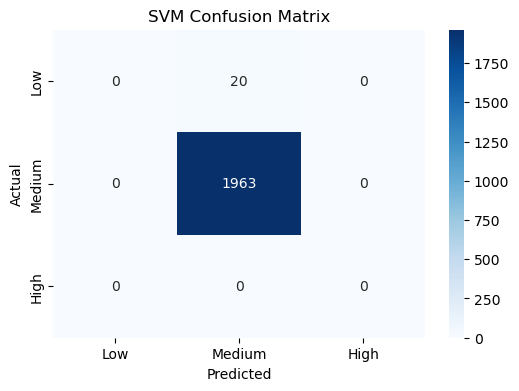

In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the dataset
data = pd.read_csv(r'C:\Users\MyHP_Laptop\Documents\StudentPerformanceFactors.csv')
df_svm = data.copy()

# Drop irrelevant or empty column
df_svm.drop(columns=['Unnamed: 20'], errors='ignore', inplace=True)

# Discretize 'Exam_Score' into performance categories
if 'Exam_Score' in df_svm.columns:
    df_svm['Performance'] = pd.cut(df_svm['Exam_Score'],
                                   bins=[0, 50, 75, 100],
                                   labels=['Low', 'Medium', 'High'])
    df_svm.drop(columns=['Exam_Score'], inplace=True)
    # Encode categorical features
label_encoders = {}
for col in df_svm.select_dtypes(include=['object', 'category']).columns:
    if col != 'Performance':
        le = LabelEncoder()
        df_svm[col] = le.fit_transform(df_svm[col])
        label_encoders[col] = le

# Encode the target column
target_le = LabelEncoder()
df_svm['Performance'] = target_le.fit_transform(df_svm['Performance'])

# Split into features and target
X = df_svm.drop('Performance', axis=1)
y = df_svm['Performance']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

# Define labels and class names
all_labels = [0, 1, 2]  # 0 = Low, 1 = Medium, 2 = High
target_names = ['Low', 'Medium', 'High']
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=all_labels, target_names=target_names, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=all_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

